In [1]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random

from collections import defaultdict

In [8]:
sns.set_style("white")

# Temporal-difference - TD(0) or one-step

In [11]:
# parameters
gamma = 0.1 # discounting rate
rewardSize = -1
gridSize = 5
alpha = 0.1 # (0,1] // stepSize
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 100000

In [12]:
# initialization
V = np.zeros((gridSize, gridSize))

returns = defaultdict(list)
# returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = defaultdict(list)
# deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [(i, j) for i in range(gridSize) for j in range(gridSize)]

In [13]:
# utils
def generateInitialState():
    initState = random.choice(states[1:-1])
    return initState

def generateNextAction():
    return random.choice(actions)

def takeAction(state, action):
    if list(state) in terminationStates:
        return 0, None
    finalState = np.array(state)+np.array(action)
    # if robot crosses wall
    if -1 in list(finalState) or gridSize in list(finalState):
        finalState = state
    return rewardSize, list(finalState)

In [14]:
for it in tqdm(range(numIterations)):
    state = generateInitialState()
    while True:
        action = generateNextAction()
        reward, finalState = takeAction(state, action)
        
        # we reached the end
        if finalState is None:
            break
        
        # modify Value function
        before =  V[state[0], state[1]]
        V[state[0], state[1]] += alpha * (reward + gamma*V[finalState[0], finalState[1]] - V[state[0], state[1]])
        deltas[state[0], state[1]].append(np.abs(before-V[state[0], state[1]]))
        
        state = finalState

In [17]:
len(deltas[(3, 3)])

133420

In [22]:
V

array([[ 0.        , -1.10778654, -1.11091756, -1.11106056, -1.11110981],
       [-1.08304466, -1.10992037, -1.11104341, -1.11110633, -1.1111001 ],
       [-1.11044745, -1.11105685, -1.11110608, -1.11106597, -1.11053252],
       [-1.11109955, -1.11110823, -1.11107091, -1.11000364, -1.07451583],
       [-1.11111   , -1.11109803, -1.11057022, -1.1001216 ,  0.        ]])

### using gamma = 0.1 // alpha = 0.1 (convergence)

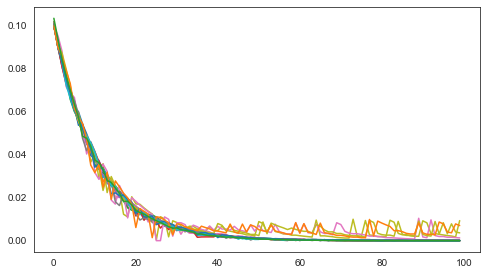

In [20]:
plt.figure(figsize=(8, 4.5))
all_series = [list(x)[:100] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

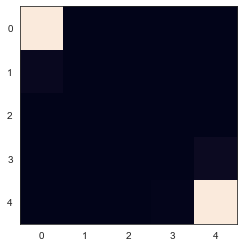

In [21]:
plt.imshow(V)

### using gamma = 0.5 // alpha = 0.5 (no convergence)

In [ ]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)